# About DataSet 

In [9]:
import matplotlib.image as mpimg

# Visualizations will be shown in the notebook.
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

import pandas as pd 
import numpy as np
import os

from pickle import dump
from sklearn.utils import shuffle


print('All modules imported.')

All modules imported.


In [10]:
img_dir = "TFS_Dataset/"
train_CSV = "TFS_Dataset/Train.csv"
test_CSV = "TFS_Dataset/Test.csv"
val_CSV = "TFS_Dataset/Meta.csv"

# Load Training Set Images:

In [11]:
%%time

# load train.csv file
train_df = pd.read_csv(train_CSV)

CPU times: user 36.7 ms, sys: 22.8 ms, total: 59.5 ms
Wall time: 66.9 ms


In [12]:
# display first five rows

train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [13]:
# display the  statistical description of the dataframe

train_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [14]:
# Shape of train_df dataframe
train_df.shape

(39209, 8)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [16]:
# the number of diffrent traffic sign classes

print("The number of unique Classes : {}".format(len(np.unique(train_df.ClassId.values))))

The number of unique Classes : 43


In [17]:
%%time
# List out the directories inside the main input folder
folders = os.listdir(img_dir+"Train")

print(folders)

['32', '35', '34', '33', '.DS_Store', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '6', '28', '17', '1', '10', '19', '26', '8', '21', '38', '36', '31', '30', '37', '39', '41', '24', '23', '4', '15', '3', '12', '40', '2', '13', '5', '14', '22', '25']
CPU times: user 730 µs, sys: 1.32 ms, total: 2.05 ms
Wall time: 1.63 ms


In [18]:

#g = sns.FacetGrid(data = train_df, col='ClassId',height=5, col_wrap=5)
#g.map(plt.hist, 'Width', bins=50)

Text(0.5, 1.0, 'Training Set Distribution')

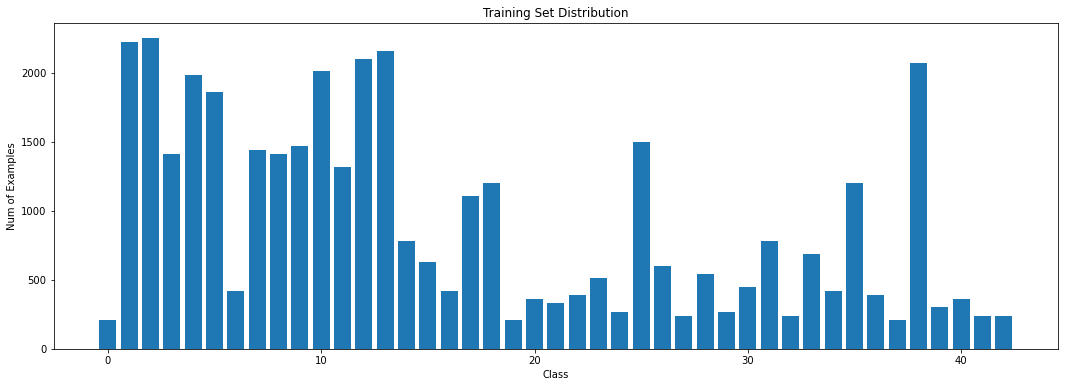

In [19]:
# display “ClassId” count in the dataframe

values, counts = np.unique(train_df['ClassId'], return_counts=True)
plt.figure(figsize=(18, 6))
plt.bar(values, counts)
plt.ylabel('Num of Examples')
plt.xlabel('Class')
plt.title("Training Set Distribution")

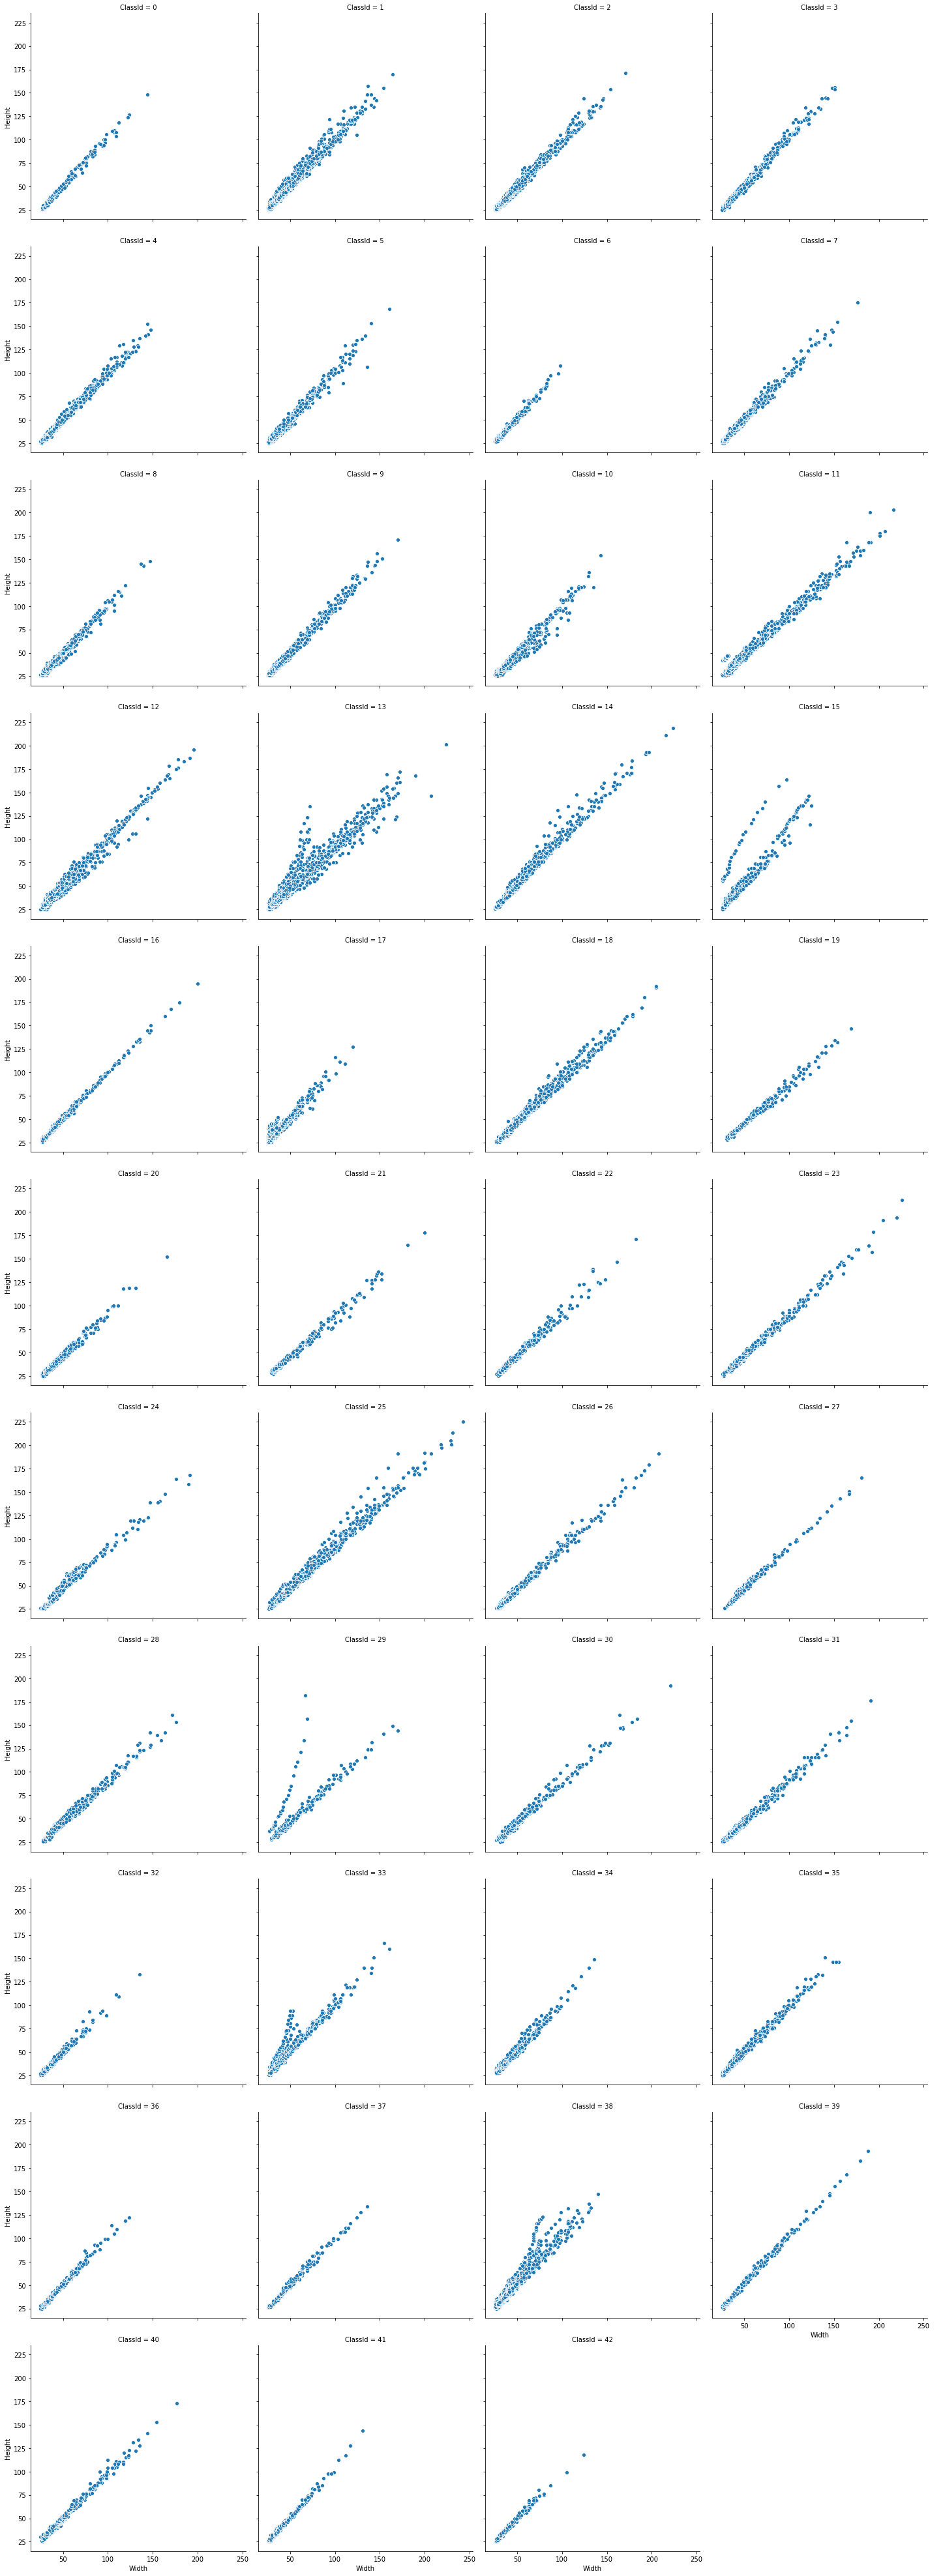

In [20]:
# Create a visualization
g = sns.relplot(data=train_df,x="Width", y="Height", col="ClassId", height=5, col_wrap=4,)
g.set_axis_labels("Width", "Height")
g.add_legend()

### Define Fixed image width x height

In [21]:
# Number of total classes
NUM_CATEGORIES = 43


# Resizing the images to 32x32x3
img_height = 32
img_width = 32
channels = 3

### Traffic Sign Classes :

In [22]:
# Dictionary to map classes.
classes = { 
    0:'Speed limit (20km/h)',1:'Speed limit (30km/h)', 2:'Speed limit (50km/h)', 3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 5:'Speed limit (80km/h)', 6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 8:'Speed limit (120km/h)', 9:'No passing', 10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 12:'Priority road', 13:'Yield', 14:'Stop', 15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 17:'No entry', 18:'General caution', 19:'Dangerous curve left', 
    20:'Dangerous curve right',21:'Double curve', 22:'Bumpy road', 23:'Slippery road', 24:'Road narrows on the right', 
    25:'Road work', 26:'Traffic signals', 27:'Pedestrians', 28:'Children crossing', 29:'Bicycles crossing', 
    30:'Beware of ice/snow',31:'Wild animals crossing',32:'End speed + passing limits', 33:'Turn right ahead', 
    34:'Turn left ahead', 35:'Ahead only', 36:'Go straight or right', 37:'Go straight or left', 
    38:'Keep right', 39:'Keep left', 40:'Roundabout mandatory', 41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
          }

## Converting RGB image data into array

In [23]:
def load_images(images):
    img_arr = []
    
    for path in images:
        image = Image.open(img_dir + path)
        image = image.resize((img_height,img_width))
        image = np.array(image)
        img_arr.append(image)

    return img_arr

In [24]:
# shuffle the dataframe rows 
train_df = shuffle(train_df)

In [25]:
# store training image paths
train_images = train_df["Path"].values

# store training labels
y_train = train_df["ClassId"].values

In [26]:
%%time 

# parse the train_images into load_images function 
X_train = load_images(train_images)

CPU times: user 10.8 s, sys: 2.91 s, total: 13.8 s
Wall time: 30 s


In [27]:
# Converting lists into numpy arrays
X_train = np.array(X_train)      
y_train = np.array(y_train)

In [28]:
print("Train Image Data Size : ",X_train.shape)
print("Train Image Label Size : ",y_train.shape)

Train Image Data Size :  (39209, 32, 32, 3)
Train Image Label Size :  (39209,)


Image sign class :  Yield


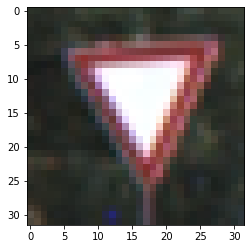

In [29]:
plt.imshow(X_train[0])
print("Image sign class : ",classes[y_train[0]])

In [30]:
X_train[0]

array([[[43, 49, 40],
        [41, 47, 39],
        [39, 44, 37],
        ...,
        [58, 64, 53],
        [59, 64, 51],
        [57, 64, 52]],

       [[40, 43, 36],
        [38, 42, 37],
        [41, 45, 40],
        ...,
        [50, 56, 47],
        [52, 60, 50],
        [55, 62, 53]],

       [[41, 43, 37],
        [34, 37, 32],
        [37, 41, 35],
        ...,
        [43, 49, 40],
        [43, 51, 43],
        [49, 57, 49]],

       ...,

       [[68, 59, 49],
        [57, 49, 38],
        [43, 40, 33],
        ...,
        [41, 48, 47],
        [44, 52, 50],
        [43, 52, 53]],

       [[87, 80, 70],
        [74, 64, 50],
        [52, 45, 36],
        ...,
        [40, 46, 42],
        [40, 50, 49],
        [44, 53, 58]],

       [[74, 69, 58],
        [84, 72, 57],
        [59, 49, 37],
        ...,
        [39, 42, 40],
        [34, 44, 43],
        [45, 53, 55]]], dtype=uint8)

In [31]:
y_train

array([13, 13, 10, ...,  5, 10, 13])

## Converting RGB image to gray and store image data into array

In [41]:
def load_gray_images(images):
    gray_img_arr = []
    
    for path in images:
        image = Image.open(img_dir + path)
        image = image.convert('L')
        image = image.resize((img_height,img_width))
        image = np.array(image)
        gray_img_arr.append(image)
    return gray_img_arr


In [42]:
%%time 

# store training image paths
train_images = train_df["Path"].values

# store training labels
y_train_gray = train_df["ClassId"].values

# parse the train_images into load_images function 
X_train_gray = load_gray_images(train_images)

CPU times: user 11.9 s, sys: 3.11 s, total: 15 s
Wall time: 31.9 s


In [85]:
# Converting lists into numpy arrays
X_train_gray = np.array(X_train_gray)      
y_train_gray = np.array(y_train_gray)

In [88]:
print("Train Image Data Size : ",X_train_gray.shape)
print("Train Image Label Size : ",y_train_gray.shape)

Train Image Data Size :  (39209, 32, 32)
Train Image Label Size :  (39209,)


Image sign class :  Yield


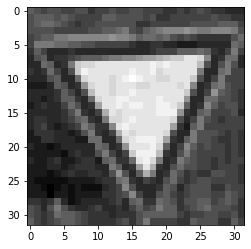

In [66]:
plt.imshow(X_train_gray[0],cmap=plt.cm.gray)
print("Image sign class : ",classes[y_train_gray[0]])

# Load Testing Set Images

In [44]:
%%time

# load train.csv file
test_df = pd.read_csv(test_CSV)

CPU times: user 12.4 ms, sys: 3.54 ms, total: 15.9 ms
Wall time: 16.5 ms


In [45]:
# Shape of train_df dataframe
test_df.shape

(12630, 8)

In [46]:
# display first five rows

test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [47]:
# the number of diffrent traffic sign classes

print("The number of unique Classes : {}".format(len(np.unique(test_df.ClassId.values))))

The number of unique Classes : 43


In [48]:
# display the  statistical description of the dataframe

test_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


In [49]:
# display the schema of the dataframe

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


Text(0.5, 1.0, 'Testing Set Distribution')

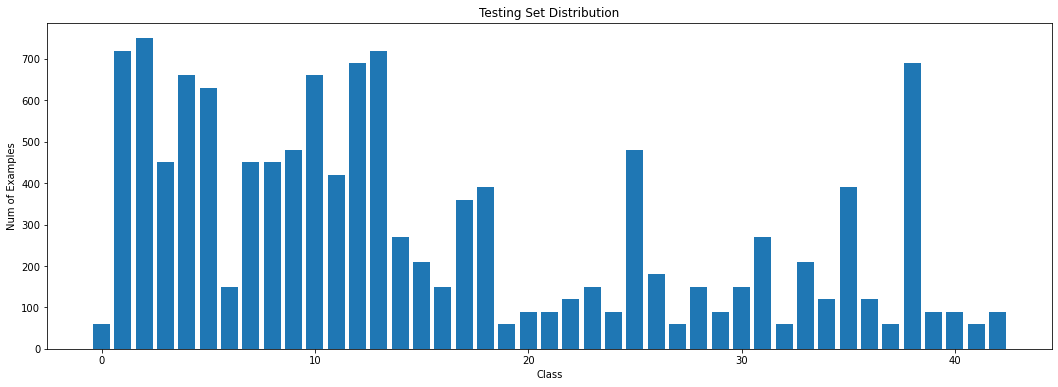

In [50]:
values, counts = np.unique(test_df['ClassId'], return_counts=True)
plt.figure(figsize=(18, 6))
plt.bar(values, counts)
plt.ylabel('Num of Examples')
plt.xlabel('Class')
plt.title("Testing Set Distribution")

## Converting RGB image data into array

In [51]:
# shuffle the dataframe rows 

test_df = shuffle(test_df)

In [52]:
# store Testing image paths
test_images = test_df["Path"].values

# store Testing labels
y_test = test_df["ClassId"].values

In [53]:
%%time 

# parse the test_images into load_images function 
X_test = load_images(test_images)

CPU times: user 3.53 s, sys: 1.01 s, total: 4.53 s
Wall time: 9.19 s


In [54]:
# Converting lists into numpy arrays
X_test = np.array(X_test)      
y_test = np.array(y_test)

In [55]:
print("Testing Image Data Size : ",X_test.shape)
print("Testing Image Label Size : ",y_test.shape)

Testing Image Data Size :  (12630, 32, 32, 3)
Testing Image Label Size :  (12630,)


In [56]:
X_test[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [253, 249, 235],
        ...,
        [228, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [57]:
y_test

array([ 9,  9, 10, ..., 25, 14,  8])

## Converting RGB image to gray and store image data into array

In [58]:
%%time 

# store training image paths
test_images = test_df["Path"].values

# store training labels
y_test_gray = test_df["ClassId"].values

# parse the train_images into load_images function 
X_test_gray = load_gray_images(test_images)

CPU times: user 3.24 s, sys: 668 ms, total: 3.91 s
Wall time: 6.24 s


In [59]:
# Converting lists into numpy arrays
X_test_gray = np.array(X_test_gray)      
y_test_gray = np.array(y_test_gray)

In [60]:
print("Test Image Data Size : ",X_test_gray.shape)
print("Test Image Label Size : ",y_test_gray.shape)

Test Image Data Size :  (12630, 32, 32)
Test Image Label Size :  (12630,)


Image sign class :  No passing


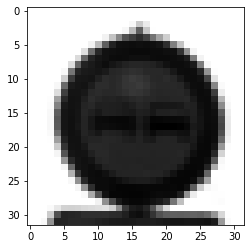

In [61]:
plt.imshow(X_test_gray[0],cmap=plt.cm.gray)
print("Image sign class : ",classes[y_test_gray[0]])

# Load Validation Set Images

In [62]:
%%time

# load train.csv file
val_df = pd.read_csv(val_CSV)

CPU times: user 2.39 ms, sys: 1.07 ms, total: 3.46 ms
Wall time: 3.07 ms


In [63]:
# Shape of train_df dataframe
val_df.shape

(43, 5)

In [64]:
# display first five rows

val_df.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [65]:
# the number of diffrent traffic sign classes

print("The number of unique Classes : {}".format(len(np.unique(val_df.ClassId.values))))

The number of unique Classes : 43


In [66]:
# display the  statistical description of the dataframe

val_df.describe()

,ClassId,ShapeId,ColorId
count,43.000000,43.000000,43.000000
mean,21.000000,0.790698,0.511628
std,12.556539,0.803508,0.935340
min,0.000000,0.000000,0.000000
25%,10.500000,0.000000,0.000000
50%,21.000000,1.000000,0.000000
75%,31.500000,1.000000,1.000000
max,42.000000,4.000000,3.000000


In [67]:
# display the schema of the dataframe

val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Path     43 non-null     object
 1   ClassId  43 non-null     int64 
 2   ShapeId  43 non-null     int64 
 3   ColorId  43 non-null     int64 
 4   SignId   43 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


Text(0.5, 1.0, 'Testing Set Distribution')

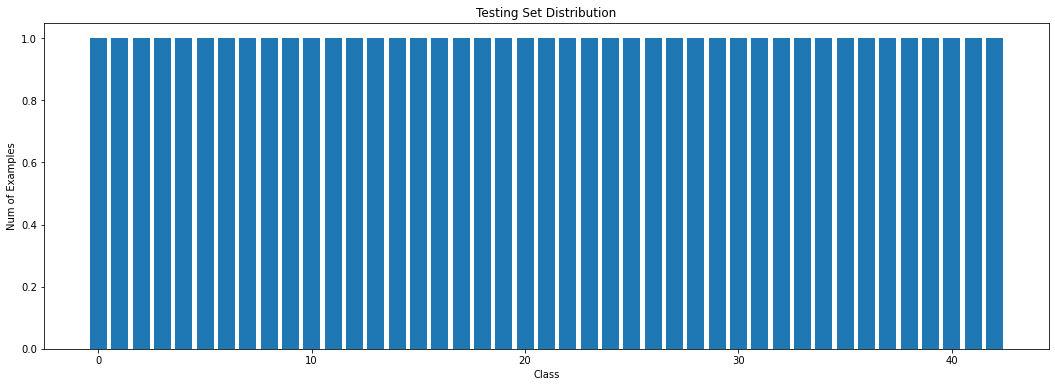

In [68]:

values, counts = np.unique(val_df['ClassId'], return_counts=True)
plt.figure(figsize=(18, 6))
plt.bar(values, counts)
plt.ylabel('Num of Examples')
plt.xlabel('Class')
plt.title("Testing Set Distribution")

In [69]:
# shuffle the dataframe rows 

val_df = shuffle(val_df)

In [70]:
# store validation image paths

val_images = val_df["Path"].values

# store validation labels
y_val = val_df["ClassId"].values

In [71]:
%%time 

# parse the val_images into load_images function 
X_val = load_images(val_images)

CPU times: user 37.4 ms, sys: 12.9 ms, total: 50.4 ms
Wall time: 60 ms


In [72]:
# Converting lists into numpy arrays

X_val = np.array(X_val)      
y_val = np.array(y_val)

In [73]:
print("Validation Image Data Size : ",X_val.shape)
print("Validation Image Label Size : ",y_val.shape)

Validation Image Data Size :  (43, 32, 32, 4)
Validation Image Label Size :  (43,)


In [74]:
X_val[0]

array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       ...,

       [[235, 196,  14, 255],
        [220,  43,  27, 255],
        [217,  33,  29, 255],
        ...,
        [218,  34,  29, 255],
        [219,  40,  28, 255],
        [239, 193,  11, 255]],

       [[232, 208,  17, 231],
        [232,  91,  21, 255],
        [222,  50,  26, 255],
        ...,
        [220,  47,  27, 255],
        [229,  78,  23, 255],
        [234, 204,  13, 242]],

       [[209

In [75]:
y_val

array([22, 11, 28, 17, 18, 21,  6,  5, 39, 29, 30, 35,  2, 15, 42, 36, 26,
       14,  9, 16,  7, 10, 25, 31, 33, 23, 40,  1,  3, 38, 27, 41, 24, 19,
        8, 34,  0, 37,  4, 20, 12, 32, 13])

## Summary

In [93]:
print("Number of Training data =", len(X_train))
print("Number of Testing data =", len(X_test))
print("RGB Image data shape =", (X_train.shape[1], X_train.shape[2], X_train.shape[3]))
print("Gray Image data shape =", (X_train_gray.shape[1],X_train_gray.shape[2]))
print("Number of classes =", NUM_CATEGORIES)

Number of Training data = 39209
Number of Testing data = 12630
RGB Image data shape = (32, 32, 3)
Gray Image data shape = (32, 32)
Number of classes = 43


### An exploratory visualization of the dataset

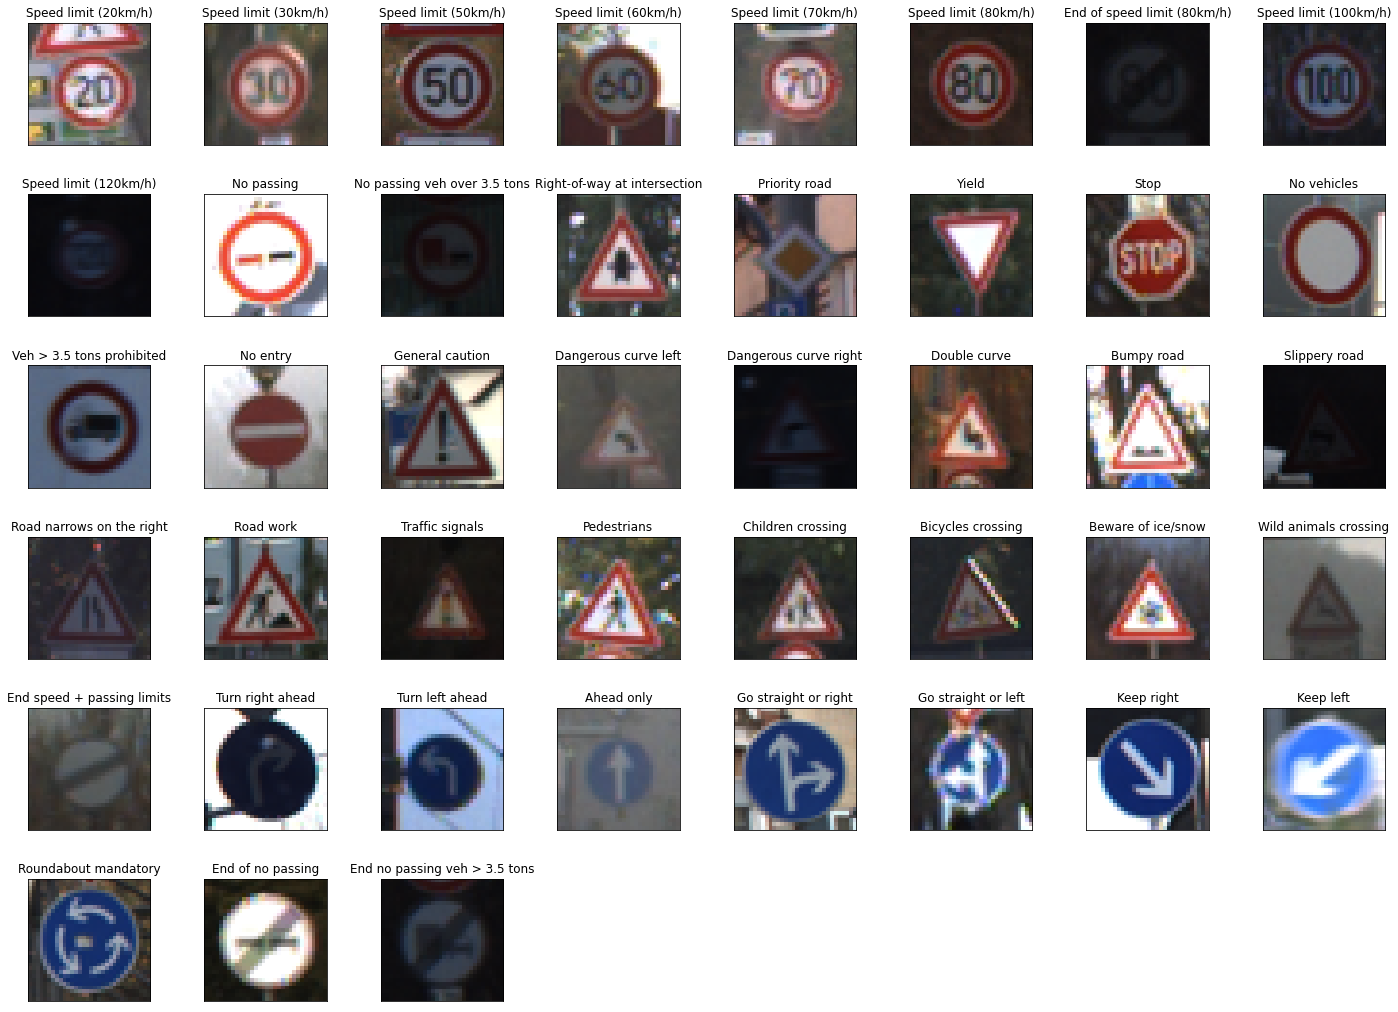

In [77]:
# Visualizations will be shown in the notebook.
%matplotlib inline

# Show onw figure for each traffic sign

plt.figure(figsize=(25, 18))
plt.subplots_adjust(hspace = .4, wspace=.1)
for i in range(0, NUM_CATEGORIES):
    index = np.where(y_train==i)[0][0]
    image = X_train[index]
    plt.subplot(6, 8, i + 1)
    plt.title(classes[i])
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])


# Pickle the file

#### pickle training set images & labels data

In [101]:
## Store Train caption Vector into pickle file
merge = [X_train, y_train]
fid = open("X_train_y_train.pkl","wb")
dump(merge, fid)
fid.close()


In [102]:
## Store GrayScale Train caption Vector into pickle file
merge = [X_train_gray, y_train_gray]
fid = open("X_train_y_train_gray.pkl","wb")
dump(merge, fid)
fid.close()

#### pickle testing set images & labels data

In [103]:
## Store Test caption vector into pickle file
merge = [X_test, y_test]
fid = open("X_test_y_test.pkl","wb")
dump(merge, fid)
fid.close()


In [104]:
## Store GrayScale Test caption vector into pickle file
merge = [X_test_gray, y_test_gray]
fid = open("X_test_y_test_gray.pkl","wb")
dump(merge, fid)
fid.close()

#### pickle validation set images & labels data

In [105]:
## Store Test caption vector into pickle file
merge = [X_val, y_val]
fid = open("X_val_y_val.pkl","wb")
dump(merge, fid)
fid.close()

#### pickle Traffic sign classes

In [106]:
## Store Test caption vector into pickle file

fid = open("Traffic_sign_Classes.pkl","wb")
dump(classes, fid)
fid.close()